In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.widgets import Slider
from nltk.stem.porter import PorterStemmer

In [26]:
df = pd.read_excel(r"C:\Users\nik596\Documents\GitHub\NBER\NBER_WP.xlsx")
df['year'] = df['paper month'].apply(lambda x: int(x[-4:]))
df['year_range'] = df['year'].apply(lambda x: 5 * np.ceil(x/5))

In [34]:
dict_yr_range = {}
yr_ranges = []
for yr in range(1981, 2021, 5):
    entry = str(yr) + "-" + str(yr+4)
    yr_ranges.append(entry)
    dict_yr_range[yr+4] = entry
df['year_range'] = df['year_range'].map(dict_yr_range).fillna(0)

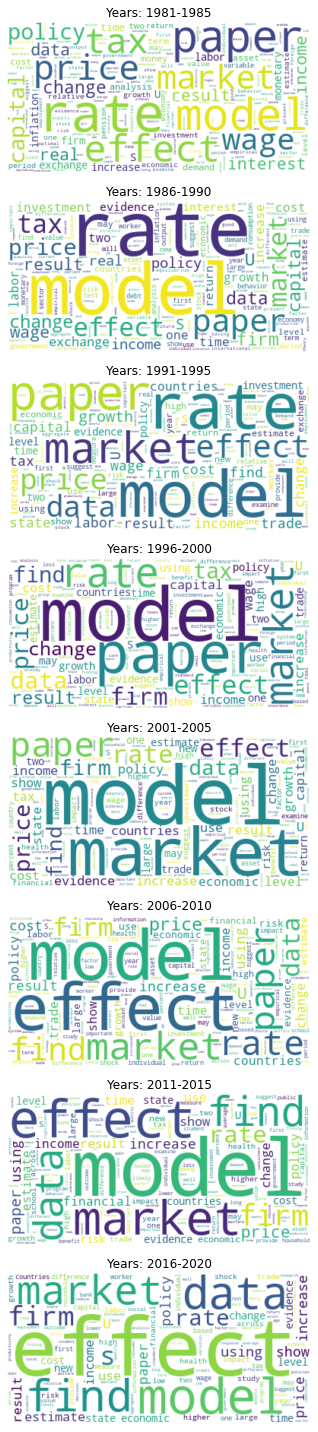

In [62]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize=(20, 20))
axes = ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8

for ax, year in zip(axes, yr_ranges):
    abstracts = list(df[df['year_range'] == year]['paper abstract'])
    all_words = " ".join(str(abs) for abs in abstracts)
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(all_words)
    ax.imshow(word_cloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f'Years: {year}')
plt.show()

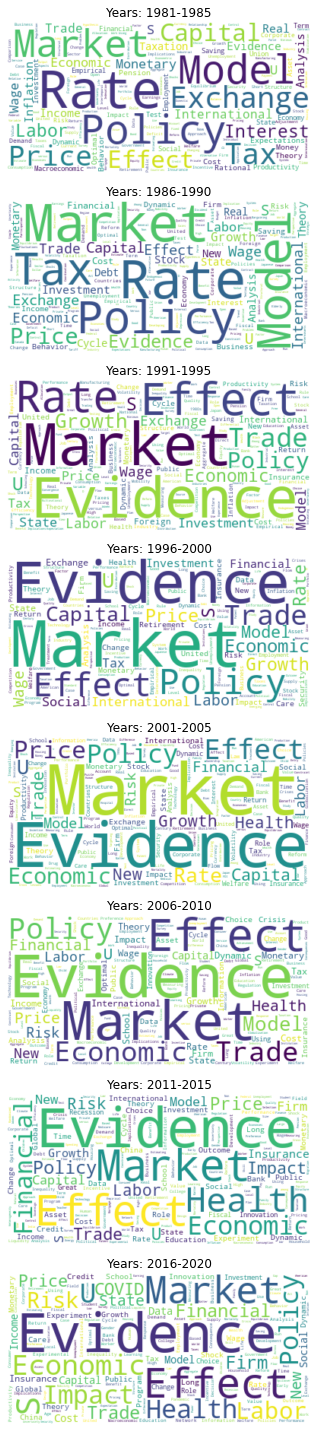

In [66]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize=(20, 20))
axes = ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8

for ax, year in zip(axes, yr_ranges):
    abstracts = list(df[df['year_range'] == year]['paper'])
    all_words = " ".join(str(abs) for abs in abstracts)
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(all_words)
    ax.imshow(word_cloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f'Years: {year}')
plt.show()